In [2]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import itertools
plt.style.use('ggplot')

In [3]:
alldata = pd.read_csv('alldata.csv')

In [4]:
alldata.head(10)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338"


In [5]:
# Null values

alldata['reviews'] = alldata['reviews'].fillna(0) #replace null values with 0.
alldata = alldata.dropna(axis=0, how = 'any') #remove rows with all null values


In [6]:
sum(alldata.isnull().any(axis=1)) # check if the removal of null's is successful

0

In [7]:
alldata.dtypes

position        object
company         object
description     object
reviews        float64
location        object
dtype: object

In [8]:
alldata['position'].describe()

count               6953
unique              5242
top       Data Scientist
freq                 351
Name: position, dtype: object

In [9]:
alldata['description'].describe()

count                                                  6953
unique                                                 6708
top       Note: By applying to this position your applic...
freq                                                      9
Name: description, dtype: object

In [10]:
alldata['position'].value_counts()

Data Scientist                                               351
Senior Data Scientist                                         96
Research Analyst                                              64
Data Engineer                                                 60
Machine Learning Engineer                                     56
                                                            ... 
Retail Financial Analyst                                       1
Scientist, Display (38)                                        1
Director of Translational Medicine                             1
Sr. Data Scientist/Modeling & Simulation Engineer Expert       1
Software Development Engineer - Machine Learning Engineer      1
Name: position, Length: 5242, dtype: int64

In [11]:
alldata['company'].value_counts()

Amazon.com                        358
Ball Aerospace                    187
Microsoft                         137
Google                            134
NYU Langone Health                 77
                                 ... 
NuWest Healthcare                   1
Pivot Bio                           1
Liberty Healthcare Corporation      1
Organic                             1
Analysis Group                      1
Name: company, Length: 2213, dtype: int64

In [12]:
alldata['reviews'].value_counts()

0.0        1627
25902.0     224
108.0       193
2.0         191
5.0         138
           ... 
1366.0        1
6868.0        1
21949.0       1
290.0         1
2409.0        1
Name: reviews, Length: 561, dtype: int64

In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from collections import defaultdict

In [14]:
# Reduce dataset to position and description

alldata = alldata[["position","description"]]

In [15]:
alldata.head()

,position,description
0,Development Director,Development Director\nALS Therapy Development ...
1,An Ostentatiously-Excitable Principal Research...,"Job Description\n\n""The road that leads to acc..."
2,Data Scientist,"Growing company located in the Atlanta, GA are..."
3,Data Analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,Assistant Professor -TT - Signal Processing & ...,DESCRIPTION\nThe Emory University Department o...


In [16]:
# Convert columns to strings

alldata = alldata.applymap(str)

In [17]:
alldata.dtypes

position       object
description    object
dtype: object

In [18]:
# Replace certain strings

alldata["description"] = alldata["description"].replace(to_replace='Apply', value="",regex=True)
alldata["description"] = alldata["description"].replace(to_replace='apply', value="",regex=True)
alldata["description"] = alldata["description"].replace(to_replace='now', value="",regex=True)
alldata["description"] = alldata["description"].replace(to_replace='apply now', value="",regex=True)
alldata["description"] = alldata["description"].replace(to_replace='Apply Now', value="",regex=True)
alldata["description"] = alldata["description"].replace(to_replace='Job Description', value="",regex=True)
alldata["description"] = alldata["description"].replace(to_replace='job description', value="",regex=True)
alldata["description"] = alldata["description"].replace(to_replace='changes everything', value="",regex=True)
alldata["description"] = alldata["description"].replace(to_replace='everything', value="",regex=True)
alldata["description"] = alldata["description"].replace(to_replace='data scientist', value="Data Scientist",regex=True)


In [19]:
alldata.head()

,position,description
0,Development Director,Development Director\nALS Therapy Development ...
1,An Ostentatiously-Excitable Principal Research...,"\n\n""The road that leads to accomplishment is ..."
2,Data Scientist,"Growing company located in the Atlanta, GA are..."
3,Data Analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,Assistant Professor -TT - Signal Processing & ...,DESCRIPTION\nThe Emory University Department o...


In [20]:
alldata.shape

(6953, 2)

In [24]:
#Select Data Analyst postings from the listings

Analyst = alldata[alldata['position'].str.contains("Data Analyst")] 

#View the slice

Analyst.head()

,position,description
3,Data Analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
100,Enterprise Data Analyst & Data Engineer,Role Overview\n\nNovelis is embarking on the j...
287,Data Analyst - Public Education Data Analysis,General Information\n**Minimum salary is liste...
298,Data Analyst,\nMake a Difference Every Day with Team Applie...
333,Quantitative Data Analyst,PIMCO is a global investment solutions provide...


In [25]:
#Select Data Scientist postings from the listings

Scientist = alldata[alldata['position'].str.contains("Data Scientist")] 

#View the slice

Scientist.head()

,position,description
2,Data Scientist,"Growing company located in the Atlanta, GA are..."
9,Senior Associate - Cognitive Data Scientist Na...,Kn for being a great place to work and build a...
12,"Senior Associate, Data Scientist",Innovate. Collaborate. Shine. Lighthouse — KPM...
15,Data Scientist,Cotiviti is looking for an industry leading Da...
18,Data Scientist,DATA SCIENTIST\n\nSUMMARY:\nAs an Amazon Web S...


In [26]:
#Select Machine learning postings from the listings

ML = alldata[alldata['position'].str.contains("Machine Learning")] 

#View the slice

ML.head()

,position,description
4,Assistant Professor -TT - Signal Processing & ...,DESCRIPTION\nThe Emory University Department o...
63,Machine Learning / Artificial Intelligence Res...,(This is an Individual Contributor Role)\n\nCo...
79,"Technical Evangelist – Database, Analytics, an...",\nDo you love data? Do you like getting people...
122,Mid Data Scientist - Machine Learning,Mid Data Scientist\nOur client in the Midtown ...
133,Tech Fall 2018 Intern - Machine Learning,The Turner Story\n\nTurner is a division of Ti...


In [32]:
#Select Big Data postings from the listings

BD = alldata[alldata['position'].str.contains("Big Data")] 

#View the slice

BD.head()

,position,description
124,Big Data SW Engineer,Kn for being a great place to work and build a...
136,Data Analytics Engineer / Big Data Engineer,"5 years of hands on experience in Hadoop, HDFS..."
160,Big Data Engineer (mid to senior level),:\nGreenSky is a leading company in the consum...
407,Big Data Pipeline Software Engineer - Java/Scala,All data has a story to tell Can you help tell...
417,Senior Director of Big Data Science & Analytics,Job description\n\nPosition Purpose:\nProvide ...


In [66]:
# Install the wordcloud library

pip install wordcloud

SyntaxError: invalid syntax (<ipython-input-66-db50b5ed4d3d>, line 3)

In [34]:
# Code for wordcloud

#import the wordcloud package

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [63]:
#Define the word cloud function with a max of 200 words

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,10), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 're', 'welcome', 'sayi', 'fo', 'Unknown', 'data','experience','work','team','will','skill','year','skills', 'location', 'role', 'overview', 'every', 'applie', 'description', 'name'}          # define additional stop words that are not contained in the dictionary
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 52,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  



In [36]:
#ngram function

def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [37]:
# Function to generate a dataframe with n_gram and top max_row frequencies

def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

In [38]:
#Function to construct side by side comparison plots

def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="royalblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="royalblue")

    ax[0].set_xlabel('Word count', size=14)
    ax[0].set_ylabel('Words', size=14)
    ax[0].set_title('Top 20 Bi-grams in Descriptions', size=18)

    ax[1].set_xlabel('Word count', size=14)
    ax[1].set_ylabel('Words', size=14)
    ax[1].set_title('Top 20 Tri-grams in Descriptions', size=18)

    fig.subplots_adjust(wspace=space)
    
    plt.show()


In [54]:
#Select descriptions from Analyst

Analyst_desc = Analyst["description"]
Analyst_desc.replace('--', np.nan, inplace=True) 
Analyst_desc_na = Analyst_desc.dropna()


/Users/siriamanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [55]:
#convert list elements to lower case

Analyst_desc_na_cleaned = [item.lower() for item in Analyst_desc_na]

In [56]:
#remove html links from list 

Analyst_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in Analyst_desc_na_cleaned]

In [57]:
#remove special characters left

Analyst_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in Analyst_desc_na_cleaned]

In [58]:
#convert to dataframe

Analyst_desc_na_cleaned = pd.DataFrame(np.array(Analyst_desc_na_cleaned).reshape(-1))

In [59]:
#Squeeze dataframe to obtain series

Analyst_cleaned = Analyst_desc_na_cleaned.squeeze()

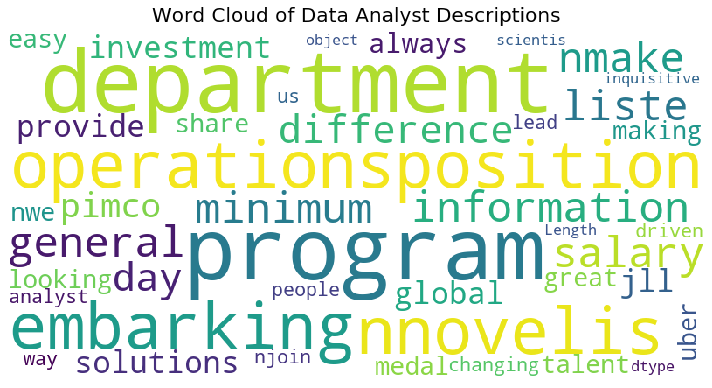

In [64]:
#run the function on the Data Analyst headlines and Remove NA values for clarity of visualisation

plot_wordcloud(Analyst_cleaned, title="Word Cloud of Data Analyst Descriptions")

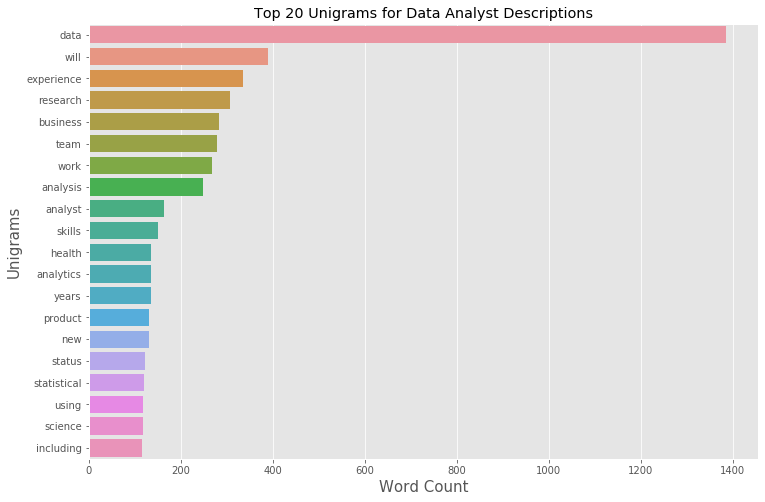

In [52]:
#Generate unigram for data analyst

Analyst_1gram = generate_ngrams(Analyst_cleaned, 1, 20)

#generate barplot for unigram

plt.figure(figsize=(12,8))
sns.barplot(Analyst_1gram["wordcount"],Analyst_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams for Data Analyst Descriptions")
plt.show()